# Jupyter notebooks

You can also create content with Jupyter Notebooks, using the [MyST-NB Sphinx extension](https://myst-nb.readthedocs.io/en/latest/).

This page demonstrates some extra functionality that works with this theme.

## Markdown + notebooks

As it is markdown, you can embed images, HTML, etc into your posts!

![](../images/cool.jpg)

You an also $add_{math}$ and

$$
math^{blocks}
$$

or

$$
\begin{align*}
\mbox{mean} la_{tex} \\ \\
math blocks
\end{align*}
$$

But make sure you \$Escape \$your \$dollar signs \$you want to keep!

## Code blocks and image outputs

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

In [1]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np

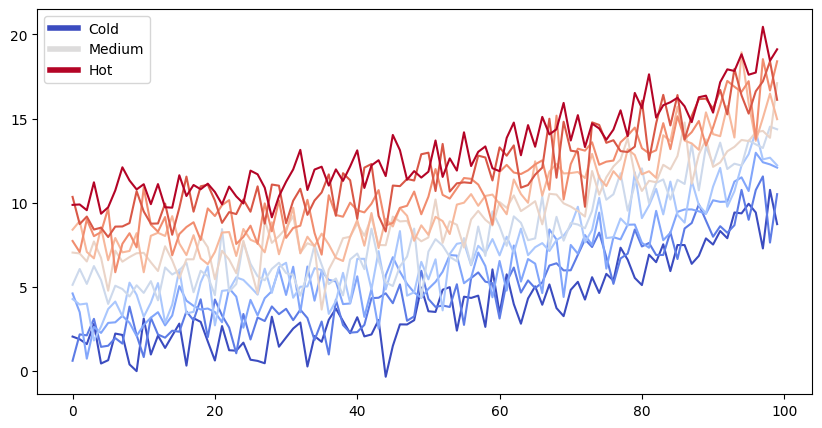

In [2]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

Note that the image above is captured and displayed.

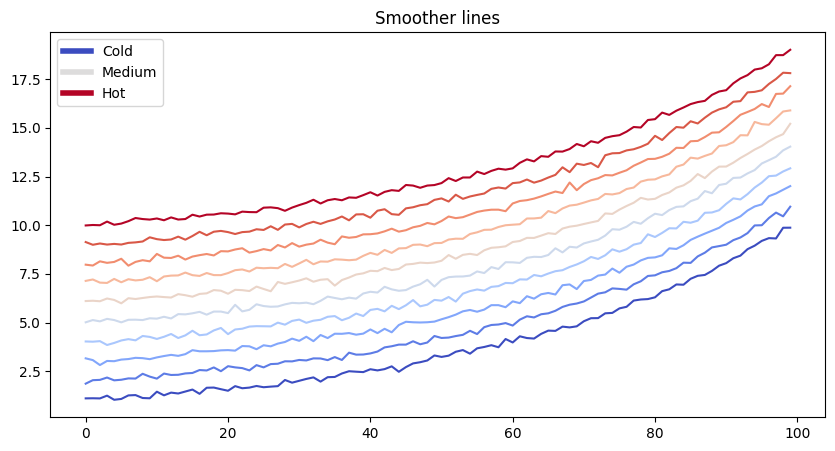

In [3]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + .1*np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])
ax.set(title="Smoother lines");

```{margin} You can also pop out content to the margin
For more information on how to do this,
check out [](content-blocks.md).
```

In [4]:
print("this works for code cells too, if you add a `margin` tag to them")

this works for code cells too, if you add a `margin` tag to them


In [5]:
# You can also include enriched outputs like Math
from IPython.display import Math
Math("\sum_{i=0}^n i^2 = \frac{(n^2+n)(2n+1)}{6}")

<IPython.core.display.Math object>

## Removing content before publishing

You can also remove some content before publishing your book to the web. For example,
in {download}`./notebooks.md`, there used to be a cell below...

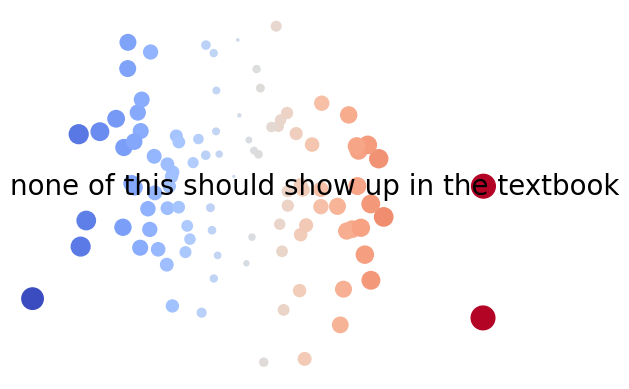

In [6]:
thisvariable = "none of this should show up in the textbook"

fig, ax = plt.subplots()
x = np.random.randn(100)
y = np.random.randn(100)
ax.scatter(x, y, s=np.abs(x*100), c=x, cmap=plt.cm.coolwarm)
ax.text(0, .5, thisvariable, fontsize=20, transform=ax.transAxes)
ax.set_axis_off()

You can also **remove only the code** so that images and other output still show up.

Below we'll *only* display an image. It was generated with Python code in a cell,
which you can {download}`see in the original notebook <./notebooks.md>`.

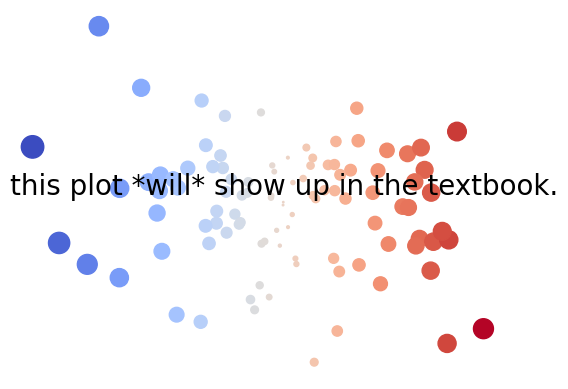

In [7]:
thisvariable = "this plot *will* show up in the textbook."

fig, ax = plt.subplots()
x = np.random.randn(100)
y = np.random.randn(100)
ax.scatter(x, y, s=np.abs(x*100), c=x, cmap=plt.cm.coolwarm)
ax.text(0, .5, thisvariable, fontsize=20, transform=ax.transAxes)
ax.set_axis_off()

And here we'll *only* display a Pandas DataFrame.

In [8]:
import pandas as pd
df = pd.DataFrame([['hi', 'there'], ['this', 'is'], ['a', 'DataFrame']], columns=['Word A', 'Word B'])
df

ModuleNotFoundError: No module named 'pandas'

You can even style Pandas DataFrames!
See [the Pandas Styling docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html) for more information.

In [ ]:
import pandas as pd

np.random.seed(24)
df = pd.DataFrame({'A': np.linspace(1, 10, 10)})
df = pd.concat([df, pd.DataFrame(np.random.randn(10, 4), columns=list('BCDE'))],
               axis=1)
df.iloc[3, 3] = np.nan
df.iloc[0, 2] = np.nan

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

df.style.\
    applymap(color_negative_red).\
    apply(highlight_max).\
    set_table_attributes('style="font-size: 10px"')

Testing margins before headers

## Interactive outputs

We can even do the same for *interactive* material. Below we'll display a map using [folium](https://python-visualization.github.io/folium/). When the notebook
is converted to Markdown, the code for creating the interactive map is retained.

**Note that this will only work for some packages.** They need to be able to output standalone HTML/Javascript, and not
depend on an underlying Python kernel to work.

In [ ]:
import folium

In [ ]:
m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain',
    attr="Placeholder attr"
)

folium.Marker(
    location=[45.3288, -121.6625],
    popup='Mt. Hood Meadows',
    icon=folium.Icon(icon='cloud'),
    attr="Placeholder attr"
).add_to(m)

folium.Marker(
    location=[45.3311, -121.7113],
    popup='Timberline Lodge',
    icon=folium.Icon(color='green')
).add_to(m)

folium.Marker(
    location=[45.3300, -121.6823],
    popup='Some Other Location',
    icon=folium.Icon(color='red', icon='info-sign'),
    attr="Placeholder attr"
).add_to(m)


m

## Rich outputs from notebook cells

Because notebooks have rich text outputs, you can store these in
your Jupyter Book as well!

In [ ]:
# The ! causes this to run as a shell command
!jupyter -h

## Formatting code cells

### Scrolling cell outputs

The traditional Jupyter Notebook interface allows you to toggle **output scrolling**
for your cells. This allows you to visualize part of a long output without it taking up
the entire page.

You can trigger this behavior in Jupyter Book by adding the following
tag to a cell's metadata:

```json
{
    "tags": [
        "scroll-output",
    ]
}
```

For example, the following cell has a long output, but will be scrollable in the book:

In [ ]:
for ii in range(40):
    print(f"this is output line {ii}")

### Scrolling cell inputs

If your input code is long and takes up a lot of your page, you can make it scrollable
as well by adding the following tag to a cell's metadata:

```json
{
    "tags": [
        "scroll-input",
    ]
}
```

For example, the following cell has a long input, but will be scrollable in the book:

In [ ]:
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
b = "This line has no meaning"
print(b)